9. Write a program to predict the quality of water

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import files
upload=files.upload()

In [3]:
data=pd.read_csv('water_dataX.csv',encoding="ISO-8859-1")
data.replace('NAN',0)


STATION CODE                                          LOCATIONS  \
0            1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1            1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2            1475                                ZUARI AT PANCHAWADI   
3            3181                        RIVER ZUARI AT BORIM BRIDGE   
4            3182                       RIVER ZUARI AT MARCAIM JETTY   
...           ...                                                ...   
1986         1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
1987         1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1988         1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA   
1989         1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA   
1990         1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA   

            STATE  Temp D.O. (mg/l)   PH CONDUCTIVITY (µmhos/cm)  \
0     DAMAN & DIU  30.6         6.7  7.5                     203   
1             GOA  29.8         5.7  7.2                     189   
2             GOA  29.5         6.3  6.9                     179   
3             GOA  29.7         5.8  6.9                      64   
4             GOA  29.5         5.8  7.3                      83   
...           ...   ...         ...  ...                     ...   
1986            0     0         7.9  738                     7.2   
1987            0    29         7.5  585                     6.3   
1988            0    28         7.6   98                     6.2   
1989            0    28         7.7   91                     6.5   
1990            0    29         7.6  110                     5.7   

     B.O.D. (mg/l) NITRATENAN N+ NITRITENANN (mg/l)  \
0                0                              0.1   
1                2                              0.2   
2              1.7                              0.1   
3              3.8                              0.5   
4              1.9                              0.4   
...            ...                              ...   
1986           2.7                            0.518   
1987           2.6                            0.155   
1988           1.2                                0   
1989           1.3                                0   
1990           1.1                                0   

     FECAL COLIFORM (MPN/100ml) TOTAL COLIFORM (MPN/100ml)Mean  year  
0                            11                             27  2014  
1                          4953                           8391  2014  
2                          3243                           5330  2014  
3                          5382                           8443  2014  
4                          3428                           5500  2014  
...                         ...                            ...   ...  
1986                      0.518                            202  2003  
1987                      0.155                            315  2003  
1988                          0                            570  2003  
1989                          0                            562  2003  
1990                          0                            546  2003  

[1991 rows x 12 columns]

In [5]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [6]:
data.columns=['station','location','state','temp','do','ph','con','bod','nn','fc','tc','year']
data

station                                           location        state  \
0       1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN  DAMAN & DIU   
1       1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...          GOA   
2       1475                                ZUARI AT PANCHAWADI          GOA   
3       3181                        RIVER ZUARI AT BORIM BRIDGE          GOA   
4       3182                       RIVER ZUARI AT MARCAIM JETTY          GOA   
...      ...                                                ...          ...   
1986    1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU          NAN   
1987    1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...          NAN   
1988    1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA          NAN   
1989    1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA          NAN   
1990    1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA          NAN   

      temp   do   ph  con  bod     nn     fc    tc  year  
0     30.6  6.7  7.5  203  NAN    0.1     11    27  2014  
1     29.8  5.7  7.2  189    2    0.2   4953  8391  2014  
2     29.5  6.3  6.9  179  1.7    0.1   3243  5330  2014  
3     29.7  5.8  6.9   64  3.8    0.5   5382  8443  2014  
4     29.5  5.8  7.3   83  1.9    0.4   3428  5500  2014  
...    ...  ...  ...  ...  ...    ...    ...   ...   ...  
1986   NAN  7.9  738  7.2  2.7  0.518  0.518   202  2003  
1987    29  7.5  585  6.3  2.6  0.155  0.155   315  2003  
1988    28  7.6   98  6.2  1.2    NAN    NAN   570  2003  
1989    28  7.7   91  6.5  1.3    NAN    NAN   562  2003  
1990    29  7.6  110  5.7  1.1    NAN    NAN   546  2003  

[1991 rows x 12 columns]

In [7]:
#conversions
data['temp']=pd.to_numeric(data['temp'],errors='coerce')
data['do']=pd.to_numeric(data['do'],errors='coerce')
data['ph']=pd.to_numeric(data['ph'],errors='coerce')
data['bod']=pd.to_numeric(data['bod'],errors='coerce')
data['con']=pd.to_numeric(data['con'],errors='coerce')
data['nn']=pd.to_numeric(data['nn'],errors='coerce')
data['tc']=pd.to_numeric(data['tc'],errors='coerce')
data.dtypes

station      object
location     object
state        object
temp        float64
do          float64
ph          float64
con         float64
bod         float64
nn          float64
fc           object
tc          float64
year          int64
dtype: object

In [13]:
data.shape

(1991, 12)

In [20]:
data.columns=['station','location','state','temp','do','ph','con','bod','nn','fc','tc','year']
data

station                                           location        state  \
0       1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN  DAMAN & DIU   
1       1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...          GOA   
2       1475                                ZUARI AT PANCHAWADI          GOA   
3       3181                        RIVER ZUARI AT BORIM BRIDGE          GOA   
4       3182                       RIVER ZUARI AT MARCAIM JETTY          GOA   
...      ...                                                ...          ...   
1986    1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU          NAN   
1987    1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...          NAN   
1988    1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA          NAN   
1989    1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA          NAN   
1990    1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA          NAN   

      temp   do     ph    con  bod     nn     fc      tc  year  
0     30.6  6.7    7.5  203.0  NaN  0.100     11    27.0  2014  
1     29.8  5.7    7.2  189.0  2.0  0.200   4953  8391.0  2014  
2     29.5  6.3    6.9  179.0  1.7  0.100   3243  5330.0  2014  
3     29.7  5.8    6.9   64.0  3.8  0.500   5382  8443.0  2014  
4     29.5  5.8    7.3   83.0  1.9  0.400   3428  5500.0  2014  
...    ...  ...    ...    ...  ...    ...    ...     ...   ...  
1986   NaN  7.9  738.0    7.2  2.7  0.518  0.518   202.0  2003  
1987  29.0  7.5  585.0    6.3  2.6  0.155  0.155   315.0  2003  
1988  28.0  7.6   98.0    6.2  1.2    NaN    NAN   570.0  2003  
1989  28.0  7.7   91.0    6.5  1.3    NaN    NAN   562.0  2003  
1990  29.0  7.6  110.0    5.7  1.1    NaN    NAN   546.0  2003  

[1991 rows x 12 columns]

In [10]:
data.tail()

station                                           location state  temp  \
1986    1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   NAN   NaN   
1987    1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   NAN  29.0   
1988    1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA   NAN  28.0   
1989    1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA   NAN  28.0   
1990    1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA   NAN  29.0   

       do     ph  con  bod     nn     fc     tc  year  
1986  7.9  738.0  7.2  2.7  0.518  0.518  202.0  2003  
1987  7.5  585.0  6.3  2.6  0.155  0.155  315.0  2003  
1988  7.6   98.0  6.2  1.2    NaN    NAN  570.0  2003  
1989  7.7   91.0  6.5  1.3    NaN    NAN  562.0  2003  
1990  7.6  110.0  5.7  1.1    NaN    NAN  546.0  2003

In [11]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))


In [13]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [14]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [15]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [16]:
#calculation of electrical conductivity
data['nec']=data.con.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))


In [17]:
#Calulation of nitrate
data['nna']=data.nn.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

station      object
location     object
state        object
temp        float64
do          float64
ph          float64
con         float64
bod         float64
nn          float64
fc           object
tc          float64
year          int64
npH           int64
wph         float64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [18]:

data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

station                                           location        state  \
0       1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN  DAMAN & DIU   
1       1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...          GOA   
2       1475                                ZUARI AT PANCHAWADI          GOA   
3       3181                        RIVER ZUARI AT BORIM BRIDGE          GOA   
4       3182                       RIVER ZUARI AT MARCAIM JETTY          GOA   
...      ...                                                ...          ...   
1986    1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU          NAN   
1987    1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...          NAN   
1988    1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA          NAN   
1989    1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA          NAN   
1990    1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA          NAN   

      temp   do     ph    con  bod     nn     fc  ...  nco  nbdo  nec  nna  \
0     30.6  6.7    7.5  203.0  NaN  0.100     11  ...   80     0   60  100   
1     29.8  5.7    7.2  189.0  2.0  0.200   4953  ...   40   100   60  100   
2     29.5  6.3    6.9  179.0  1.7  0.100   3243  ...   40   100   60  100   
3     29.7  5.8    6.9   64.0  3.8  0.500   5382  ...   40    80  100  100   
4     29.5  5.8    7.3   83.0  1.9  0.400   3428  ...   40   100   80  100   
...    ...  ...    ...    ...  ...    ...    ...  ...  ...   ...  ...  ...   
1986   NaN  7.9  738.0    7.2  2.7  0.518  0.518  ...   60   100  100  100   
1987  29.0  7.5  585.0    6.3  2.6  0.155  0.155  ...   60   100  100  100   
1988  28.0  7.6   98.0    6.2  1.2    NaN    NAN  ...   40   100  100    0   
1989  28.0  7.7   91.0    6.5  1.3    NaN    NAN  ...   40   100  100    0   
1990  29.0  7.6  110.0    5.7  1.1    NaN    NAN  ...   40   100  100    0   

        wdo   wbdo   wec  wna    wco    wqi  
0     28.10   0.00  0.54  2.8  22.48  70.42  
1     22.48  23.40  0.54  2.8  11.24  76.96  
2     28.10  23.40  0.54  2.8  11.24  79.28  
3     22.48  18.72  0.90  2.8  11.24  69.34  
4     22.48  23.40  0.72  2.8  11.24  77.14  
...     ...    ...   ...  ...    ...    ...  
1986  28.10  23.40  0.90  2.8  16.86  72.06  
1987  28.10  23.40  0.90  2.8  16.86  72.06  
1988  28.10  23.40  0.90  0.0  11.24  63.64  
1989  28.10  23.40  0.90  0.0  11.24  63.64  
1990  28.10  23.40  0.90  0.0  11.24  63.64  

[1991 rows x 25 columns]

In [22]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()

In [23]:
type(ag)
ag

year
2003    64.647045
2004    59.890000
2005    72.111429
2006    71.224571
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.853551
Name: wqi, dtype: float64

In [25]:
data=ag.reset_index(level=0)
type(data)

pandas.core.frame.DataFrame

In [26]:
data

year        wqi
0   2003  64.647045
1   2004  59.890000
2   2005  72.111429
3   2006  71.224571
4   2007  72.549000
5   2008  72.570943
6   2009  74.085193
7   2010  74.648723
8   2011  75.647013
9   2012  78.969041
10  2013  75.009425
11  2014  76.853551

In [27]:
#using linear regression to predict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
y = data['wqi']
x=data[['year']]

In [30]:
reg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train)
print(y_train)

    year
9   2012
8   2011
2   2005
11  2014
0   2003
1   2004
5   2008
7   2010
10  2013
9     78.969041
8     75.647013
2     72.111429
11    76.853551
0     64.647045
1     59.890000
5     72.570943
7     74.648723
10    75.009425
Name: wqi, dtype: float64


In [31]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
print(x_test)
a=reg.predict(x_test)
a

   year
3  2006
4  2007
6  2009


array([68.54194473, 69.82923968, 72.40382957])

In [67]:
y_test

3    71.224571
4    72.549000
6    74.085193
Name: wqi, dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:5.81


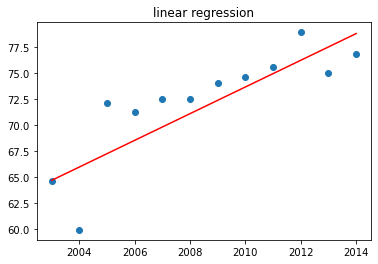

In [74]:
#plotting the actual and predicted results
x_axis=data[['year']]
y_axis=data.wqi
y1_axis=reg.predict(x_axis)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()
